$\color{blue}{\huge {\text{4. Getting Started with Neural Networks: Classification and Regression}}}$

This chapter will apply three new tasks covering the three most common use cases of neural networks—binary classification, multiclass classification, and scalar regression:

• Classifying movie reviews as positive or negative (binary classification)<br>
• Classifying news wires by topic (multiclass classification)<br>
• Estimating the price of a house, given real-estate data (scalar regression)<br>

By the end of this chapter, you’ll be able to use neural networks to handle simple classification and regression tasks over vector data. You’ll then be ready to start building a more principled, theory-driven understanding of machine learning in chapter 5.

<h3><span style="color:black">4.1 Classifying Movie Reviews: A Binary Classification Example</span></h3>

#### 4.1.1 The IMDB dataset
You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.<br>
The following code will load the dataset (when you run it the first time, about 80 MB of data will be downloaded to your machine).

##### Listing 4.1 Loading the IMDB dataset:

In [172]:
# from tensorflow.keras.datasets import imdb
# (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/russellconte/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/russellconte/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

The variables `train_data` and `test_data` are lists of reviews; each review is a list of word indices (encoding a sequence of words). `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for <b><i><span style="color:blue">negative</span></i></b> and 1 stands for <b><i><span style="color:blue">positive:</span></i></b>

In [173]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


For kicks, here's how you can quickly decode one of these reviews back to English words:
##### Listing 4.2 Decoding reviews back to text:

In [174]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review) # allows me to see the review! Yay, this works!

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

#### 4.1.2 Preparing the data
You can’t directly feed lists of integers into a neural network. They have all different lengths, but a neural network expects to process contiguous batches of data. You have to turn your lists into tensors. There are two ways to do that:<br>
<br>• Pad your lists so that they all have the same length, then turn them into an integer tensor of shape `(samples, max_length)`, and start your model with a layer capable of handling such integer tensors (the `Embedding layer`, which we’ll cover in detail later in the book).<br>
• <b><i><span style="color:blue">Multi-hot encode</span></i></b> your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use a `Dense` layer, capable of handling floating-point vector data, as the first layer in your model.

#### Listing 4.3 Encoding the integer sequences via multi-hot encoding

In [175]:
# import numpy as np
# def vectorize_sequences(sequences, dimension = 10000):
#     results = np.zeros((len(sequences), dimension))
#     for i, sequence in enumerate(sequences):
#         for j in sequence:
#             results[i, j] = 1.
#         return results
# x_train = vectorize_sequences(train_data)
# x_test = vectorize_sequences(test_data)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

• Creates an all-zero matrix of shape (`len(sequences`), `dimension`)<br>
• Sets specific indices of results[i] to 1s<br>
• Vectorized training data<br>
• Vectorized test data<br>

Here's what the samples look like now:

In [176]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

You should also vectorize your lables, which is straightforward:

In [177]:
y_train = np.asarray(train_labels.astype("float32"))
y_test = np.array(test_labels).astype("float32")

#### 4.1.3 Build Your Model
The input data is vectors, and the labels are scalars (1s and 0s): this is one of the simplest problem setups you’ll ever encounter. A type of model that performs well on such a problem is a plain stack of densely-connected (`Dense`) layers with `relu` activations.<br>
There are two key architecture decisions to be made about such a stack of Dense layers:<br><br>
• How many layers to use<br>
• How many units to choose for each layer

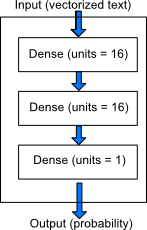

In [178]:
from IPython.display import Image
Image(filename= "4.1_The_three-layer_model.jpg")
#### Listing 4.1 Model Definition

In [179]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


The intermediate layers use relu as their activation function, and the final layer uses a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target "1": how likely the review is to be positive). A `relu` (rectified linear unit) is a function meant to zero out negative values (see figure 4.2), whereas a sigmoid "squashes" arbitrary values into the `[0, 1]` interval (see figure 4.3), outputting something that can be interpreted as a probability.

Text(0, 0.5, '$f(x)$')

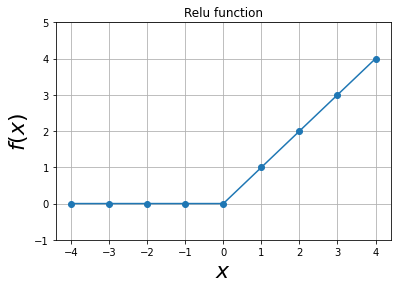

In [180]:
# courtesy of http://www.kawahara.ca/ipython/ReLU.html
# Import needed libraries and other python stuff here.
# Show figures directly in the notebook.
%matplotlib inline
import matplotlib.pyplot as plt # For plotting.
import numpy as np # To create matrices.
# Here we define the ReLU function.
def f(x):
    """ReLU returns 1 if x>0, else 0."""
    return np.maximum(0,x)
X = np.arange(-4,5,1)
Y = f(X)
plt.plot(X,Y,'o-')
plt.title('Relu function')
plt.ylim(-1,5); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel('$f(x)$', fontsize=22)

Text(0.5, 1.0, 'Sigmoid function')

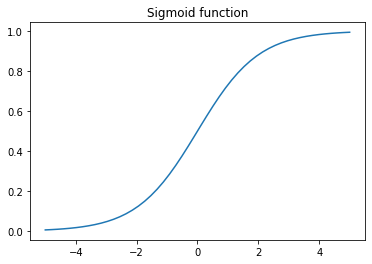

In [181]:
# Courtesy of https://stackoverflow.com/questions/55959156/how-can-i-graph-a-numerical-function-using-python-and-matplotlib

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(arr, scale=1):
    arr = np.asarray(arr)
    result = 1/(1 + np.exp(-arr*scale))
    return result

x = np.linspace(-5, 5)
y = sigmoid(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.title('Sigmoid function')

Finally, you need to choose a loss function and an optimizer. Because you’re facing a binary classification problem and the output of your model is a probability (you end your model with a single-unit layer with a sigmoid activation), it’s best to use the `binary_crossentropy` loss. It isn’t the only viable choice: you could use, for instance, `mean_squared_error`. But crossentropy is usually the best choice when you’re dealing with models that output probabilities.
#### Listing 4.5 Compiling the model

In [182]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

#### 4.14 Validating your approach
As you learned in chapter 3, a deep learning model should never be evaluated on its training data—it’s standard practice to use a "validation set" to monitor the accuracy of the model during training. Here, you’ll create a validation set by setting apart 10,000 samples from the original training data.
#### Listing 4.6 Setting aside a validation set

In [183]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

You’ll now train the model for 20 epochs (20 iterations over all samples in the training data), in mini-batches of 512 samples. At the same time, you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by passing the validation data as the `validation_data` argument.
#### Listing 4.7 Training your model

In [184]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
 1/30 [>.............................] - ETA: 18s - loss: 0.6976 - accuracy: 0.4727

2021-09-11 11:02:12.036536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5240 - accuracy: 0.7811 

2021-09-11 11:02:12.924661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 33ms/step - loss: 0.5240 - accuracy: 0.7811 - val_loss: 0.3960 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3152 - accuracy: 0.8992 - val_loss: 0.3078 - val_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2309 - accuracy: 0.9240 - val_loss: 0.2809 - val_accuracy: 0.8909

The dictionary contains four entries: one per metric that was being monitored during training and during validation. In the following two listing, let’s use Matplotlib to plot the training and validation loss side by side (see figure 4.4), as well as the training and validation accuracy (see figure 4.5). Note that your own results may vary slightly due to a different random initialization of your model.
#### Listing 4.8 Plotting the training and validation losses:

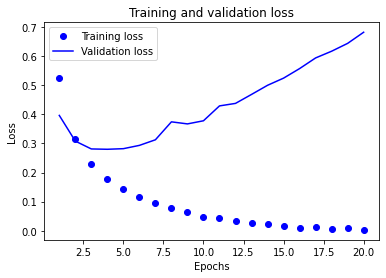

In [185]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In precise terms, what you’re seeing is <b><i><span style="color:blue">overfitting</span></i></b>: after the fourth epoch, you’re over-optimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

In this case, to prevent overfitting, you could stop training after four epochs. In general, you can use a range of techniques to mitigate overfitting, which we’ll cover in chapter 5.<br>
Let’s train a new model from scratch for four epochs and then evaluate it on the test data.
#### Listing 4.10 Retraining a model from scratch

In [186]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/2
 5/49 [==>...........................] - ETA: 0s - loss: 0.6741 - accuracy: 0.5977 

2021-09-11 11:02:22.656500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 13ms/step - loss: 0.4644 - accuracy: 0.8215
Epoch 2/2
 32/782 [>.............................] - ETA: 3s - loss: 0.2676 - accuracy: 0.8955  

2021-09-11 11:02:24.649398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 4s 5ms/step - loss: 0.2871 - accuracy: 0.8891

[0.2870715856552124, 0.8891200423240662]
The first number, 0.28707 is the test loss, and the second number, 0.88912 is the test accuracy.<br>
This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, you should be able to get close to 95%.